x = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1]
 y = [0.1, 0.1, 0.3, 0.1, 0.3, 0.2, 0.2, 0.3, 0.4, 0.6, 0.4, 0.3, 0.6, 0.4, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.7, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.7, 0.5, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 

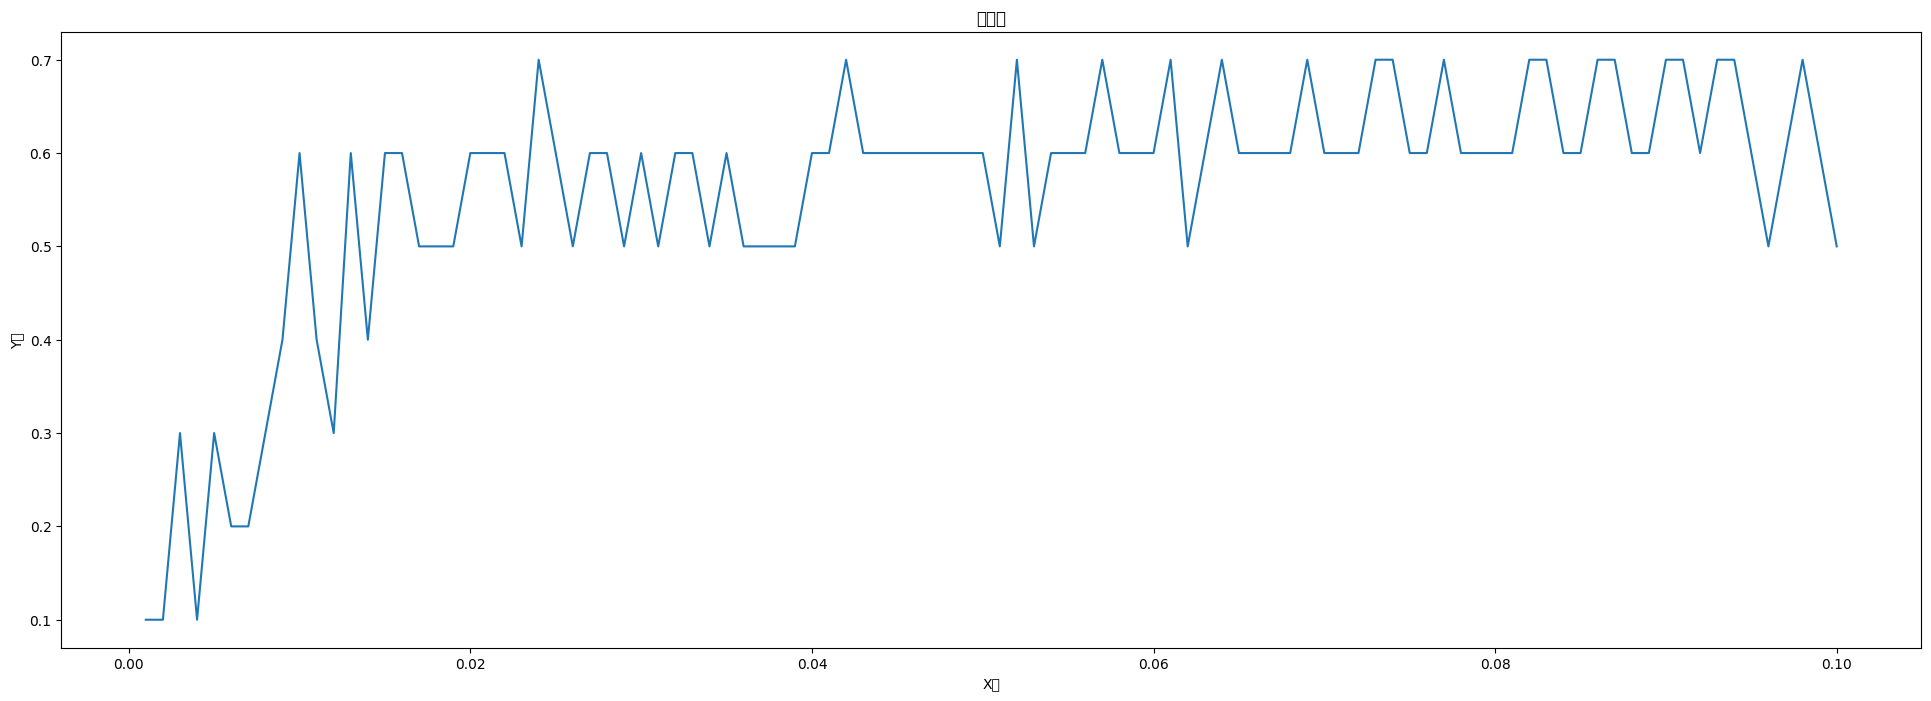

In [7]:
# 计算模块
import numpy as np
# 特殊公式模块
import scipy.special as sp
import matplotlib.pyplot as plt
from IPython.display import clear_output

def draw():
    plt.subplots(figsize=(24, 8))
    plt.plot(x, y)
    plt.show()

# 随机权重矩阵
def random_weight_matrix(len1, len2):
    # 正态分布
    return np.random.normal(0.0, pow(len1, -0.5), (len1, len2))

# 转为矩阵
def convert_matrix(list):
    return np.array(list, ndmin=2).T

# 计算操作
def output_calc(weight, input, activation_fn):
    return activation_fn(np.dot(weight, input))


class neuralNetwork:
    # 初始化神经网络
    def __init__(self, nodes_info, learning_grate):
        # 输入层、隐藏层、输出层
        self.nodes_input = nodes_info['input']
        self.nodes_hide = nodes_info['hide']
        self.nodes_output = nodes_info['output']

        # 学习率
        self.lr = learning_grate

        # 输入层与隐藏层之间的权重矩阵
        self.w_ih = random_weight_matrix(self.nodes_hide, self.nodes_input)
        # 隐藏层与输出层之间的权重矩阵
        self.w_ho = random_weight_matrix(self.nodes_output, self.nodes_hide)

		# 激活函数（sigmoid）
        self.activation_fn = lambda x: sp.expit(x)
        
        # 空哈希值
        self.hash_val = ''

    # 训练神经网络
    def train(self, input_list, target_list):
        input = convert_matrix(input_list)
        target = convert_matrix(target_list)

        # input = convert_matrix(input_list)
        self.calc_input(input_list)

        # 算出误差（目标 - 结果）
        # 输出层误差
        output_error = target - self.final_output
        # 隐藏层误差
        hidden_error = np.dot(self.w_ho.T, output_error)

        # 通过误差修改
        self.w_ho += self.lr * np.dot((output_error * self.final_output * (1 - self.final_output)), np.transpose(self.hidden_output))
        self.w_ih += self.lr * np.dot((hidden_error * self.hidden_output * (1 - self.hidden_output)), np.transpose(input))

    # 查询神经网络
    def query(self, input_list):
        # 将输入数组转为矩阵
        # input = convert_matrix(input_list)
        self.calc_input(input_list)

        return self.final_output
    
    # 定义计算隐藏层、输出层值函数
    # 通过内置的哈希校验判断输入是否相同，如果相同，则不计算
    def calc_input(self, input_list):
        hash_val = hash(''.join(str(i) for i in input_list))
        if self.hash_val != hash_val:
            self.hash_val = hash_val
            self.hidden_output = output_calc(self.w_ih, convert_matrix(input_list), self.activation_fn)
            self.final_output = output_calc(self.w_ho, self.hidden_output, self.activation_fn)


x = []
y = []
def get_score(learning_grate):
    # 节点信息
    neural_node_info = {
        'input': 784,
        'hide': 200,
        'output': 10
    }
    # 学习率
    # learning_grate = 0.3

    # 实例化一个神经网络对象
    example = neuralNetwork(neural_node_info, learning_grate)
    # 以列表载入mnist训练数据集文件内容
    # with open('mnist_dataset/pjreddie/mnist_train.csv', 'r') as training_data_file:
    with open('mnist_dataset/mini/mnist_train_100.csv', 'r') as training_data_file:
        training_data_list = training_data_file.readlines()

    # 遍历训练数据集中的所有记录
    for record in training_data_list:
        # 用逗号分隔记录
        all_values = record.split(',')
        # 转换输入
        inputs = (np.asfarray(all_values[1:]) / 255 * 0.99 + 0.01)
        # 设定目标值
        targets = np.zeros(neural_node_info['output']) + 0.01
        # all_values[0] 就是此记录的目标
        targets[int(all_values[0])] = 0.99
        
        example.train(inputs, targets)

    # 以数组存储测试数据
    with open('mnist_dataset/mini/mnist_test_10.csv') as test_data_file:
    # with open('mnist_dataset/pjreddie/mnist_test.csv') as test_data_file:
        test_data_list = test_data_file.readlines()

    # 添加计分板
    scorecard = []

    for record in test_data_list:
        all_values = record.split(',')

        correct_label = int(all_values[0])
        # print(f'目标值:{correct_label}')

        inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01

        # 学习成果
        output = example.query(inputs)

        # 得出最大值
        label = np.argmax(output)
        # print(f'实际值: {label}')

        # 如果成功算出则加1，反之加0
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)

    # print(scorecard)

    scorecard_arr = np.asarray(scorecard)
    score = scorecard_arr.sum() / scorecard_arr.size
    # print(f'得分: {score}')
    y.append(score)
    x.append(learning_grate)
    clear_output()
    print(f'x = {x}\n y = {y}')
    draw()
    
# from decimal import Decimal
step = 0.001
for i in range(100):
    get_score(round(step, 3))
    step += 0.001
# print(x, y)

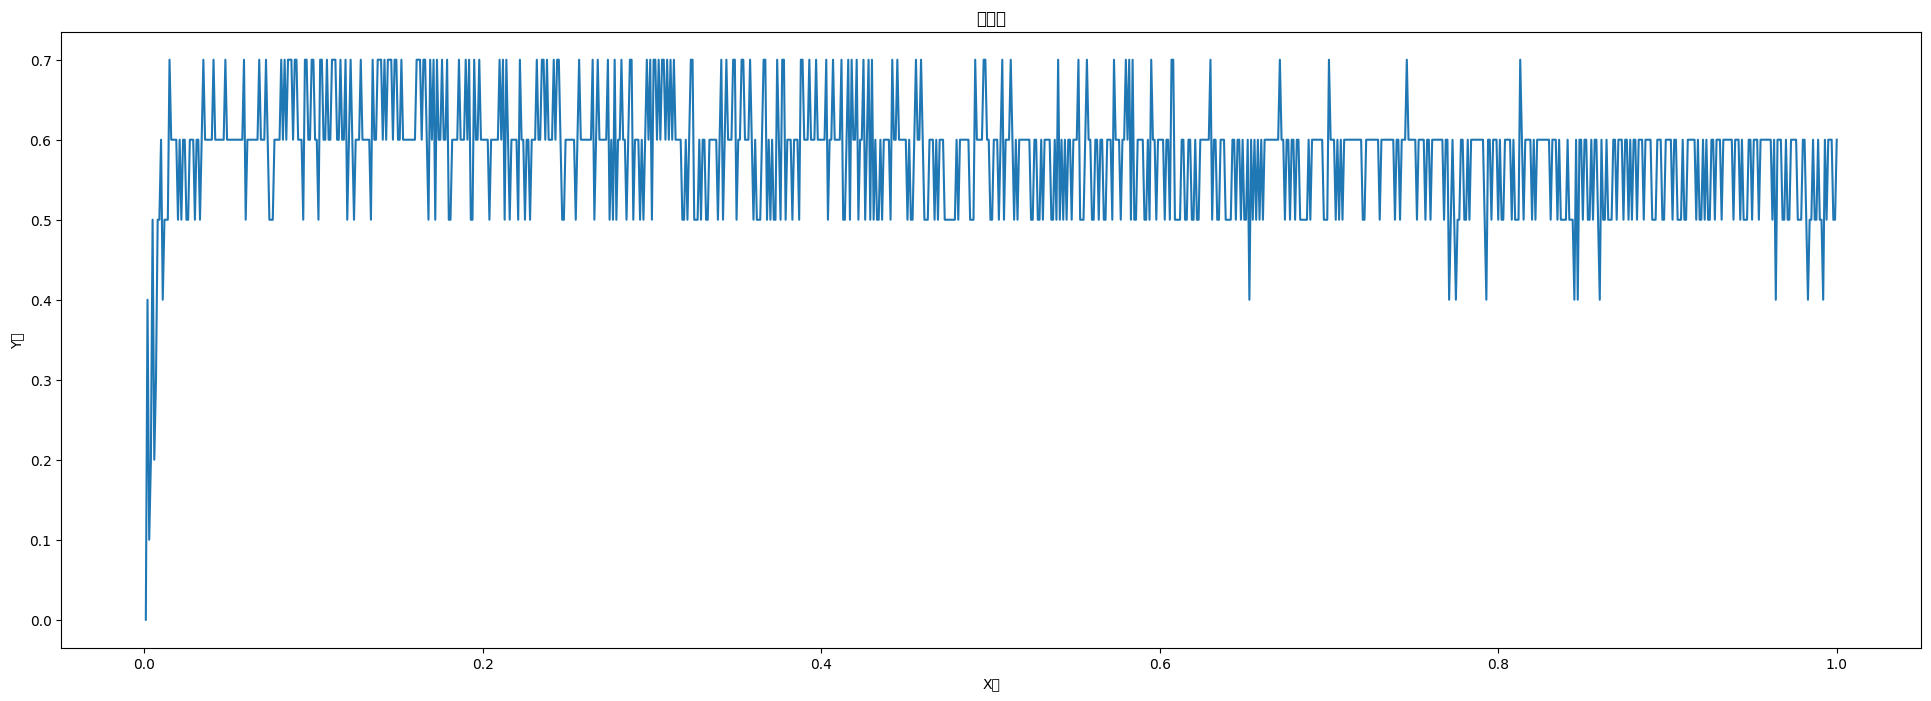

In [8]:
x = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148, 0.149, 0.15, 0.151, 0.152, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16, 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17, 0.171, 0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18, 0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189, 0.19, 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198, 0.199, 0.2, 0.201, 0.202, 0.203, 0.204, 0.205, 0.206, 0.207, 0.208, 0.209, 0.21, 0.211, 0.212, 0.213, 0.214, 0.215, 0.216, 0.217, 0.218, 0.219, 0.22, 0.221, 0.222, 0.223, 0.224, 0.225, 0.226, 0.227, 0.228, 0.229, 0.23, 0.231, 0.232, 0.233, 0.234, 0.235, 0.236, 0.237, 0.238, 0.239, 0.24, 0.241, 0.242, 0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 0.25, 0.251, 0.252, 0.253, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26, 0.261, 0.262, 0.263, 0.264, 0.265, 0.266, 0.267, 0.268, 0.269, 0.27, 0.271, 0.272, 0.273, 0.274, 0.275, 0.276, 0.277, 0.278, 0.279, 0.28, 0.281, 0.282, 0.283, 0.284, 0.285, 0.286, 0.287, 0.288, 0.289, 0.29, 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3, 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31, 0.311, 0.312, 0.313, 0.314, 0.315, 0.316, 0.317, 0.318, 0.319, 0.32, 0.321, 0.322, 0.323, 0.324, 0.325, 0.326, 0.327, 0.328, 0.329, 0.33, 0.331, 0.332, 0.333, 0.334, 0.335, 0.336, 0.337, 0.338, 0.339, 0.34, 0.341, 0.342, 0.343, 0.344, 0.345, 0.346, 0.347, 0.348, 0.349, 0.35, 0.351, 0.352, 0.353, 0.354, 0.355, 0.356, 0.357, 0.358, 0.359, 0.36, 0.361, 0.362, 0.363, 0.364, 0.365, 0.366, 0.367, 0.368, 0.369, 0.37, 0.371, 0.372, 0.373, 0.374, 0.375, 0.376, 0.377, 0.378, 0.379, 0.38, 0.381, 0.382, 0.383, 0.384, 0.385, 0.386, 0.387, 0.388, 0.389, 0.39, 0.391, 0.392, 0.393, 0.394, 0.395, 0.396, 0.397, 0.398, 0.399, 0.4, 0.401, 0.402, 0.403, 0.404, 0.405, 0.406, 0.407, 0.408, 0.409, 0.41, 0.411, 0.412, 0.413, 0.414, 0.415, 0.416, 0.417, 0.418, 0.419, 0.42, 0.421, 0.422, 0.423, 0.424, 0.425, 0.426, 0.427, 0.428, 0.429, 0.43, 0.431, 0.432, 0.433, 0.434, 0.435, 0.436, 0.437, 0.438, 0.439, 0.44, 0.441, 0.442, 0.443, 0.444, 0.445, 0.446, 0.447, 0.448, 0.449, 0.45, 0.451, 0.452, 0.453, 0.454, 0.455, 0.456, 0.457, 0.458, 0.459, 0.46, 0.461, 0.462, 0.463, 0.464, 0.465, 0.466, 0.467, 0.468, 0.469, 0.47, 0.471, 0.472, 0.473, 0.474, 0.475, 0.476, 0.477, 0.478, 0.479, 0.48, 0.481, 0.482, 0.483, 0.484, 0.485, 0.486, 0.487, 0.488, 0.489, 0.49, 0.491, 0.492, 0.493, 0.494, 0.495, 0.496, 0.497, 0.498, 0.499, 0.5, 0.501, 0.502, 0.503, 0.504, 0.505, 0.506, 0.507, 0.508, 0.509, 0.51, 0.511, 0.512, 0.513, 0.514, 0.515, 0.516, 0.517, 0.518, 0.519, 0.52, 0.521, 0.522, 0.523, 0.524, 0.525, 0.526, 0.527, 0.528, 0.529, 0.53, 0.531, 0.532, 0.533, 0.534, 0.535, 0.536, 0.537, 0.538, 0.539, 0.54, 0.541, 0.542, 0.543, 0.544, 0.545, 0.546, 0.547, 0.548, 0.549, 0.55, 0.551, 0.552, 0.553, 0.554, 0.555, 0.556, 0.557, 0.558, 0.559, 0.56, 0.561, 0.562, 0.563, 0.564, 0.565, 0.566, 0.567, 0.568, 0.569, 0.57, 0.571, 0.572, 0.573, 0.574, 0.575, 0.576, 0.577, 0.578, 0.579, 0.58, 0.581, 0.582, 0.583, 0.584, 0.585, 0.586, 0.587, 0.588, 0.589, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6, 0.601, 0.602, 0.603, 0.604, 0.605, 0.606, 0.607, 0.608, 0.609, 0.61, 0.611, 0.612, 0.613, 0.614, 0.615, 0.616, 0.617, 0.618, 0.619, 0.62, 0.621, 0.622, 0.623, 0.624, 0.625, 0.626, 0.627, 0.628, 0.629, 0.63, 0.631, 0.632, 0.633, 0.634, 0.635, 0.636, 0.637, 0.638, 0.639, 0.64, 0.641, 0.642, 0.643, 0.644, 0.645, 0.646, 0.647, 0.648, 0.649, 0.65, 0.651, 0.652, 0.653, 0.654, 0.655, 0.656, 0.657, 0.658, 0.659, 0.66, 0.661, 0.662, 0.663, 0.664, 0.665, 0.666, 0.667, 0.668, 0.669, 0.67, 0.671, 0.672, 0.673, 0.674, 0.675, 0.676, 0.677, 0.678, 0.679, 0.68, 0.681, 0.682, 0.683, 0.684, 0.685, 0.686, 0.687, 0.688, 0.689, 0.69, 0.691, 0.692, 0.693, 0.694, 0.695, 0.696, 0.697, 0.698, 0.699, 0.7, 0.701, 0.702, 0.703, 0.704, 0.705, 0.706, 0.707, 0.708, 0.709, 0.71, 0.711, 0.712, 0.713, 0.714, 0.715, 0.716, 0.717, 0.718, 0.719, 0.72, 0.721, 0.722, 0.723, 0.724, 0.725, 0.726, 0.727, 0.728, 0.729, 0.73, 0.731, 0.732, 0.733, 0.734, 0.735, 0.736, 0.737, 0.738, 0.739, 0.74, 0.741, 0.742, 0.743, 0.744, 0.745, 0.746, 0.747, 0.748, 0.749, 0.75, 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758, 0.759, 0.76, 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767, 0.768, 0.769, 0.77, 0.771, 0.772, 0.773, 0.774, 0.775, 0.776, 0.777, 0.778, 0.779, 0.78, 0.781, 0.782, 0.783, 0.784, 0.785, 0.786, 0.787, 0.788, 0.789, 0.79, 0.791, 0.792, 0.793, 0.794, 0.795, 0.796, 0.797, 0.798, 0.799, 0.8, 0.801, 0.802, 0.803, 0.804, 0.805, 0.806, 0.807, 0.808, 0.809, 0.81, 0.811, 0.812, 0.813, 0.814, 0.815, 0.816, 0.817, 0.818, 0.819, 0.82, 0.821, 0.822, 0.823, 0.824, 0.825, 0.826, 0.827, 0.828, 0.829, 0.83, 0.831, 0.832, 0.833, 0.834, 0.835, 0.836, 0.837, 0.838, 0.839, 0.84, 0.841, 0.842, 0.843, 0.844, 0.845, 0.846, 0.847, 0.848, 0.849, 0.85, 0.851, 0.852, 0.853, 0.854, 0.855, 0.856, 0.857, 0.858, 0.859, 0.86, 0.861, 0.862, 0.863, 0.864, 0.865, 0.866, 0.867, 0.868, 0.869, 0.87, 0.871, 0.872, 0.873, 0.874, 0.875, 0.876, 0.877, 0.878, 0.879, 0.88, 0.881, 0.882, 0.883, 0.884, 0.885, 0.886, 0.887, 0.888, 0.889, 0.89, 0.891, 0.892, 0.893, 0.894, 0.895, 0.896, 0.897, 0.898, 0.899, 0.9, 0.901, 0.902, 0.903, 0.904, 0.905, 0.906, 0.907, 0.908, 0.909, 0.91, 0.911, 0.912, 0.913, 0.914, 0.915, 0.916, 0.917, 0.918, 0.919, 0.92, 0.921, 0.922, 0.923, 0.924, 0.925, 0.926, 0.927, 0.928, 0.929, 0.93, 0.931, 0.932, 0.933, 0.934, 0.935, 0.936, 0.937, 0.938, 0.939, 0.94, 0.941, 0.942, 0.943, 0.944, 0.945, 0.946, 0.947, 0.948, 0.949, 0.95, 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96, 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97, 0.971, 0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98, 0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.0]
y = [0.0, 0.4, 0.1, 0.2, 0.5, 0.2, 0.3, 0.5, 0.5, 0.6, 0.4, 0.5, 0.5, 0.5, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.7, 0.6, 0.7, 0.7, 0.7, 0.6, 0.7, 0.7, 0.6, 0.6, 0.6, 0.5, 0.7, 0.7, 0.6, 0.6, 0.7, 0.7, 0.6, 0.6, 0.5, 0.7, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.7, 0.7, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.7, 0.5, 0.6, 0.7, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.7, 0.6, 0.6, 0.7, 0.7, 0.7, 0.6, 0.7, 0.6, 0.7, 0.7, 0.7, 0.6, 0.7, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.6, 0.7, 0.7, 0.6, 0.5, 0.7, 0.6, 0.7, 0.5, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.7, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.7, 0.5, 0.5, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.7, 0.5, 0.7, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.7, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.7, 0.7, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.7, 0.7, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.5, 0.6, 0.5, 0.7, 0.5, 0.6, 0.6, 0.7, 0.6, 0.6, 0.5, 0.6, 0.7, 0.7, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.7, 0.6, 0.7, 0.5, 0.7, 0.7, 0.6, 0.7, 0.6, 0.7, 0.7, 0.6, 0.7, 0.6, 0.7, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.7, 0.7, 0.5, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7, 0.7, 0.5, 0.6, 0.6, 0.7, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.5, 0.6, 0.5, 0.5, 0.5, 0.6, 0.7, 0.7, 0.5, 0.6, 0.5, 0.6, 0.5, 0.5, 0.7, 0.6, 0.5, 0.7, 0.7, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.7, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.5, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.5, 0.5, 0.6, 0.7, 0.5, 0.7, 0.6, 0.6, 0.7, 0.5, 0.6, 0.6, 0.7, 0.5, 0.6, 0.7, 0.5, 0.7, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.7, 0.6, 0.6, 0.7, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.7, 0.5, 0.6, 0.6, 0.6, 0.7, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.7, 0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7, 0.5, 0.5, 0.5, 0.6, 0.7, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.7, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.7, 0.6, 0.7, 0.5, 0.7, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.7, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.7, 0.7, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.4, 0.6, 0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.7, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.4, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.5, 0.7, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.5, 0.5, 0.4, 0.6, 0.4, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5, 0.4, 0.6, 0.5, 0.5, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.4, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.4, 0.5, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.5, 0.4, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6]
draw()


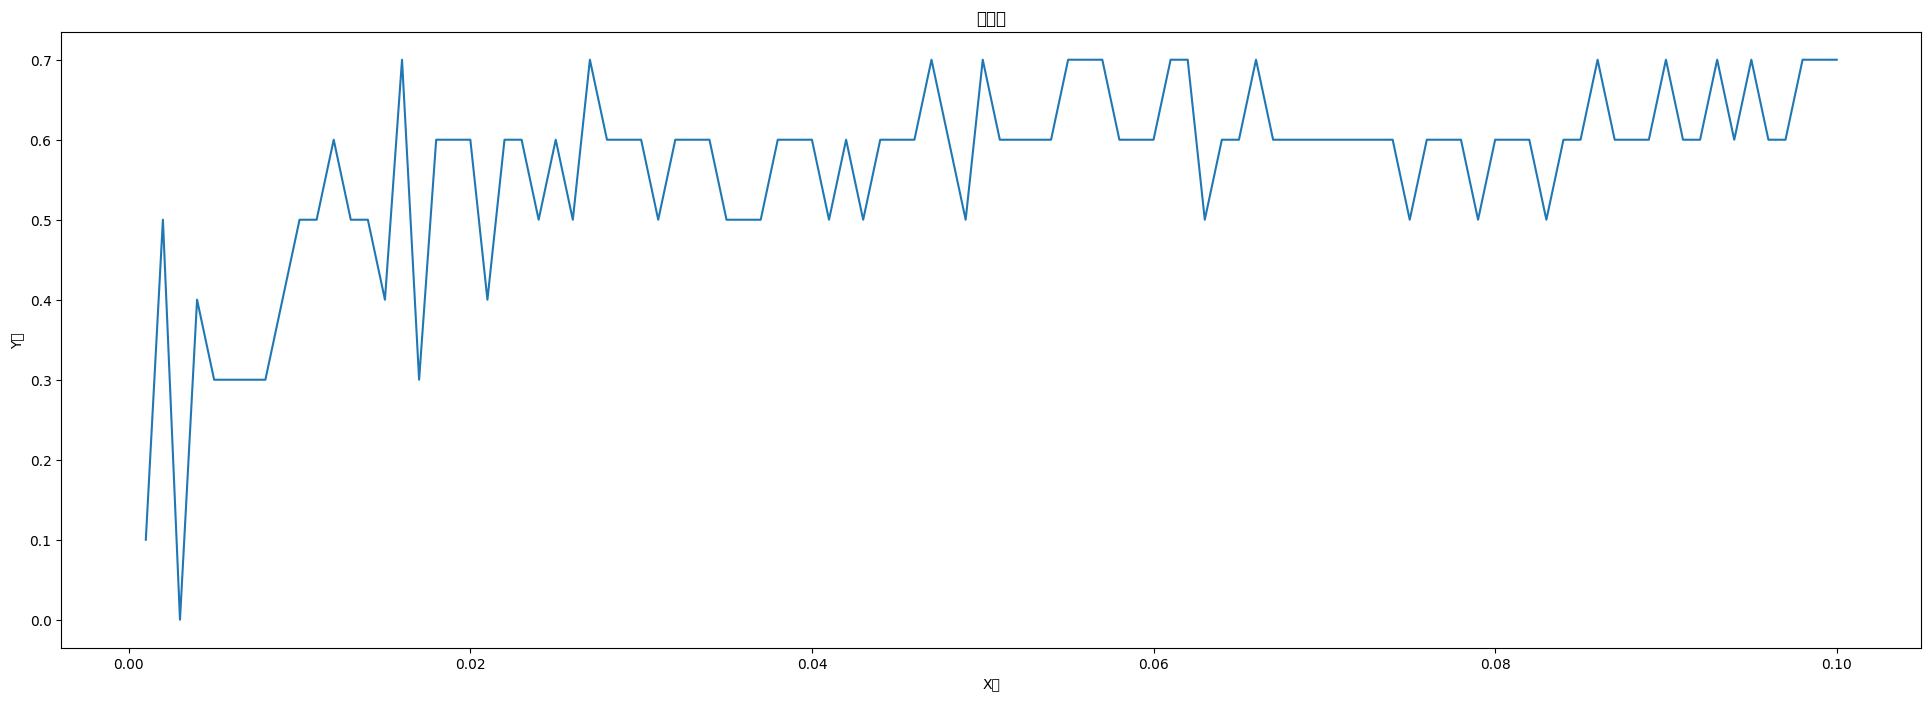

In [9]:
x = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1]
y = [0.1, 0.5, 0.0, 0.4, 0.3, 0.3, 0.3, 0.3, 0.4, 0.5, 0.5, 0.6, 0.5, 0.5, 0.4, 0.7, 0.3, 0.6, 0.6, 0.6, 0.4, 0.6, 0.6, 0.5, 0.6, 0.5, 0.7, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7, 0.6, 0.5, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.7, 0.7, 0.5, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.7, 0.6, 0.7, 0.6, 0.6, 0.7, 0.7, 0.7]
draw()

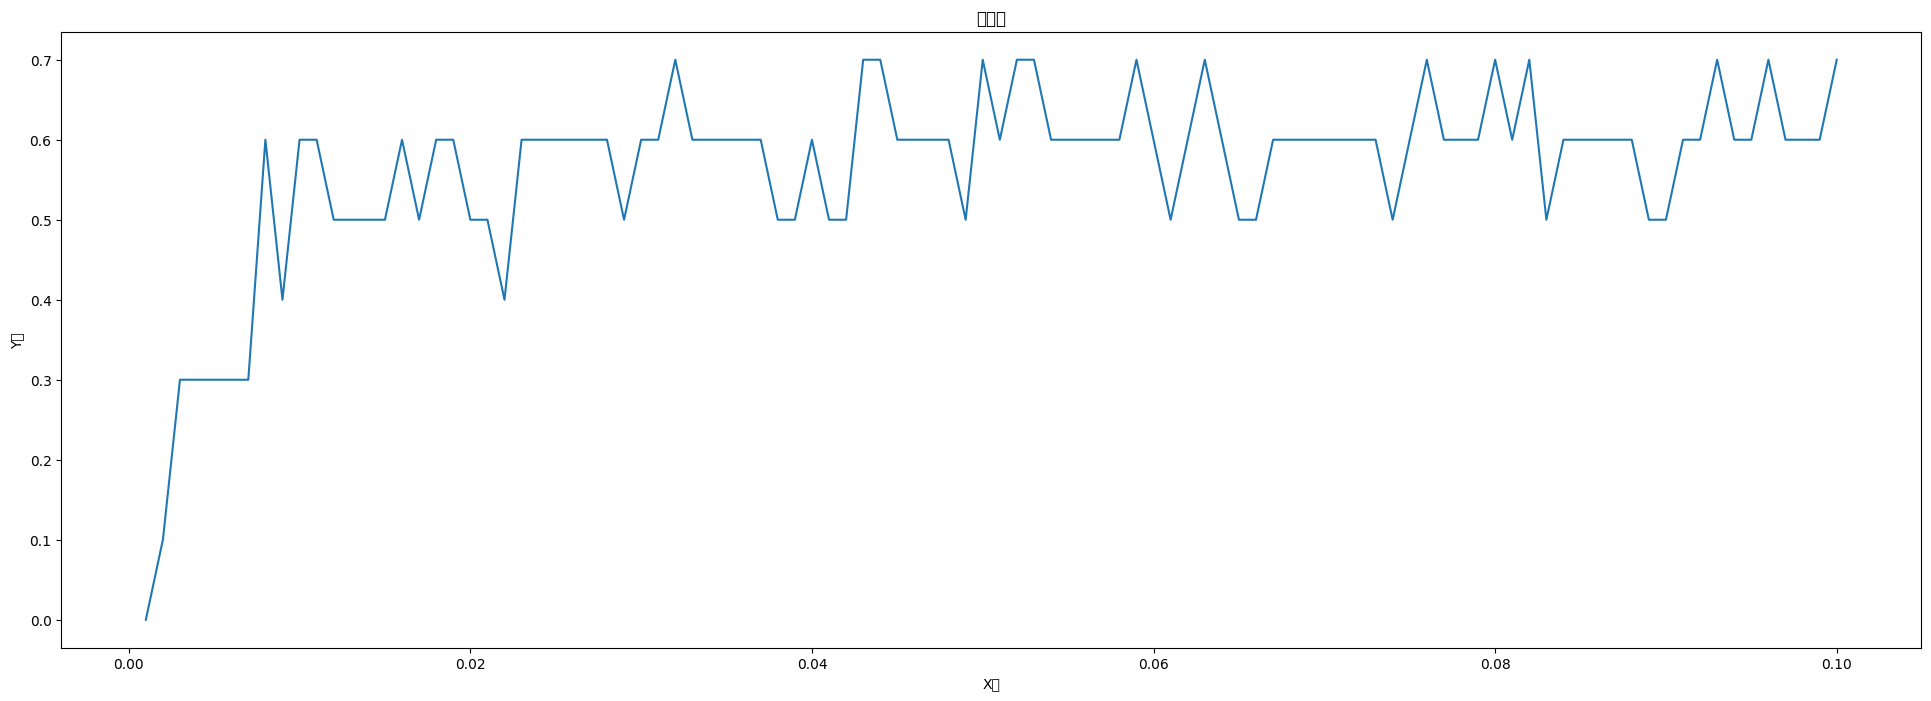

In [10]:
x = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.010000000000000002, 0.011000000000000003, 0.012000000000000004, 0.013000000000000005, 0.014000000000000005, 0.015000000000000006, 0.016000000000000007, 0.017000000000000008, 0.01800000000000001, 0.01900000000000001, 0.02000000000000001, 0.02100000000000001, 0.022000000000000013, 0.023000000000000013, 0.024000000000000014, 0.025000000000000015, 0.026000000000000016, 0.027000000000000017, 0.028000000000000018, 0.02900000000000002, 0.03000000000000002, 0.03100000000000002, 0.03200000000000002, 0.03300000000000002, 0.03400000000000002, 0.035000000000000024, 0.036000000000000025, 0.037000000000000026, 0.03800000000000003, 0.03900000000000003, 0.04000000000000003, 0.04100000000000003, 0.04200000000000003, 0.04300000000000003, 0.04400000000000003, 0.04500000000000003, 0.046000000000000034, 0.047000000000000035, 0.048000000000000036, 0.04900000000000004, 0.05000000000000004, 0.05100000000000004, 0.05200000000000004, 0.05300000000000004, 0.05400000000000004, 0.05500000000000004, 0.05600000000000004, 0.057000000000000044, 0.058000000000000045, 0.059000000000000045, 0.060000000000000046, 0.06100000000000005, 0.06200000000000005, 0.06300000000000004, 0.06400000000000004, 0.06500000000000004, 0.06600000000000004, 0.06700000000000005, 0.06800000000000005, 0.06900000000000005, 0.07000000000000005, 0.07100000000000005, 0.07200000000000005, 0.07300000000000005, 0.07400000000000005, 0.07500000000000005, 0.07600000000000005, 0.07700000000000005, 0.07800000000000006, 0.07900000000000006, 0.08000000000000006, 0.08100000000000006, 0.08200000000000006, 0.08300000000000006, 0.08400000000000006, 0.08500000000000006, 0.08600000000000006, 0.08700000000000006, 0.08800000000000006, 0.08900000000000007, 0.09000000000000007, 0.09100000000000007, 0.09200000000000007, 0.09300000000000007, 0.09400000000000007, 0.09500000000000007, 0.09600000000000007, 0.09700000000000007, 0.09800000000000007, 0.09900000000000007, 0.10000000000000007]
y = [0.0, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.4, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.4, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.5, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.7, 0.6, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.5, 0.6, 0.7, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7, 0.6, 0.7, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.6, 0.6, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.7]
draw()

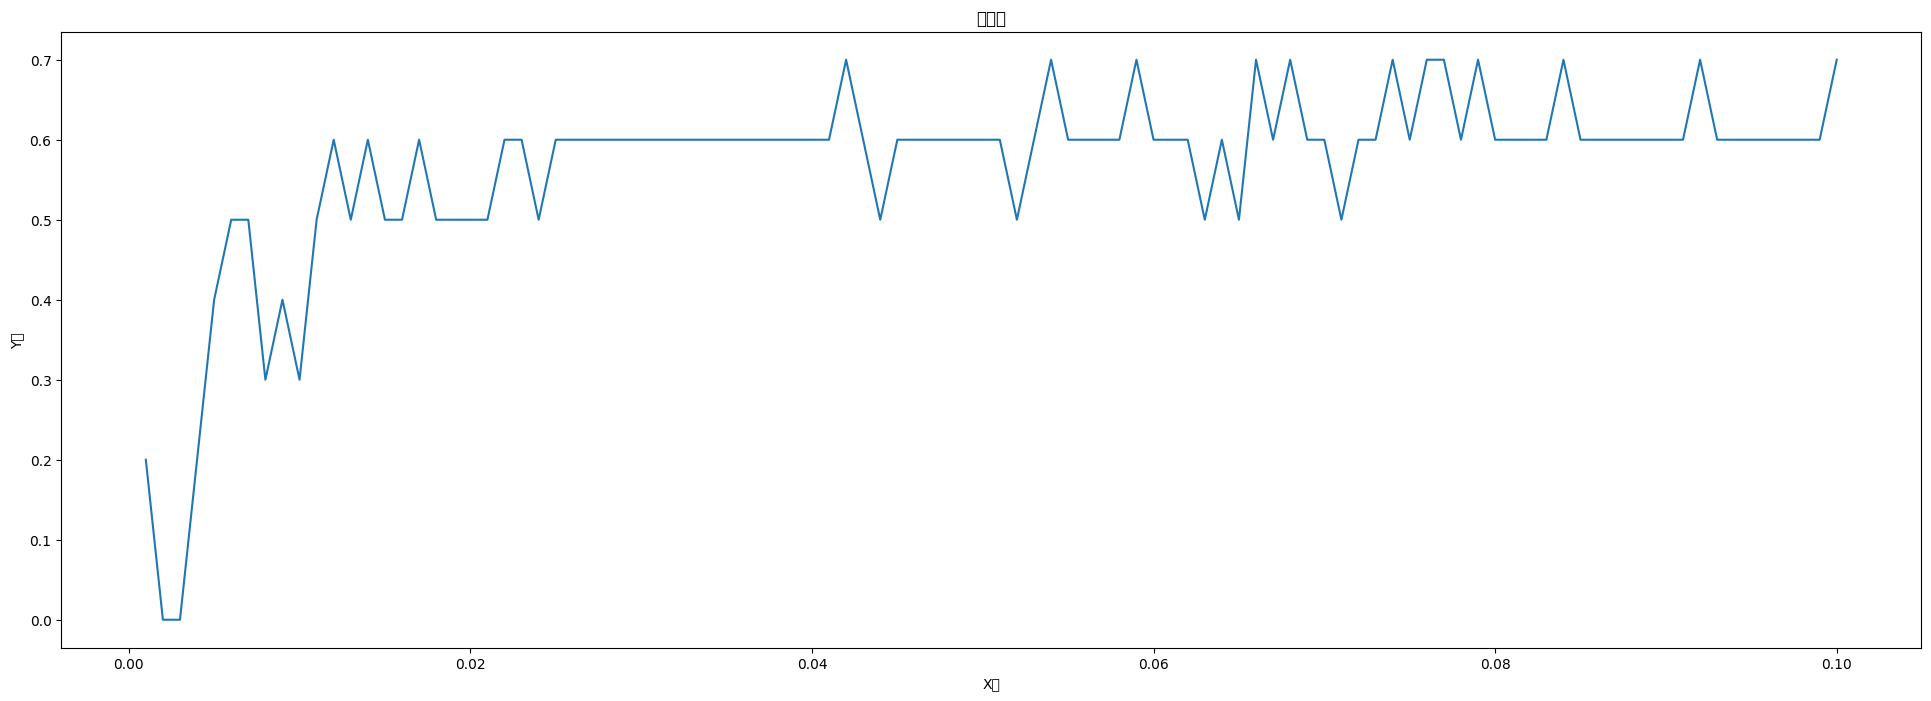

In [11]:
x = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.010000000000000002, 0.011000000000000003, 0.012000000000000004, 0.013000000000000005, 0.014000000000000005, 0.015000000000000006, 0.016000000000000007, 0.017000000000000008, 0.01800000000000001, 0.01900000000000001, 0.02000000000000001, 0.02100000000000001, 0.022000000000000013, 0.023000000000000013, 0.024000000000000014, 0.025000000000000015, 0.026000000000000016, 0.027000000000000017, 0.028000000000000018, 0.02900000000000002, 0.03000000000000002, 0.03100000000000002, 0.03200000000000002, 0.03300000000000002, 0.03400000000000002, 0.035000000000000024, 0.036000000000000025, 0.037000000000000026, 0.03800000000000003, 0.03900000000000003, 0.04000000000000003, 0.04100000000000003, 0.04200000000000003, 0.04300000000000003, 0.04400000000000003, 0.04500000000000003, 0.046000000000000034, 0.047000000000000035, 0.048000000000000036, 0.04900000000000004, 0.05000000000000004, 0.05100000000000004, 0.05200000000000004, 0.05300000000000004, 0.05400000000000004, 0.05500000000000004, 0.05600000000000004, 0.057000000000000044, 0.058000000000000045, 0.059000000000000045, 0.060000000000000046, 0.06100000000000005, 0.06200000000000005, 0.06300000000000004, 0.06400000000000004, 0.06500000000000004, 0.06600000000000004, 0.06700000000000005, 0.06800000000000005, 0.06900000000000005, 0.07000000000000005, 0.07100000000000005, 0.07200000000000005, 0.07300000000000005, 0.07400000000000005, 0.07500000000000005, 0.07600000000000005, 0.07700000000000005, 0.07800000000000006, 0.07900000000000006, 0.08000000000000006, 0.08100000000000006, 0.08200000000000006, 0.08300000000000006, 0.08400000000000006, 0.08500000000000006, 0.08600000000000006, 0.08700000000000006, 0.08800000000000006, 0.08900000000000007, 0.09000000000000007, 0.09100000000000007, 0.09200000000000007, 0.09300000000000007, 0.09400000000000007, 0.09500000000000007, 0.09600000000000007, 0.09700000000000007, 0.09800000000000007, 0.09900000000000007, 0.10000000000000007]

y = [0.2, 0.0, 0.0, 0.2, 0.4, 0.5, 0.5, 0.3, 0.4, 0.3, 0.5, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.7, 0.6, 0.7, 0.6, 0.6, 0.5, 0.6, 0.6, 0.7, 0.6, 0.7, 0.7, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7]
draw()